In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import datetime
import matplotlib as mpl
import pandas as pd
import scipy.stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

import uncertainties as unc
import uncertainties.unumpy as unp
from pylab import *

In [42]:
x = ['2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02', '2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
    '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
    '2019-01', '2019-02', '2019-03', '2019-04' ]

# Font size
font_setting = {'family':'Times New Roman', 'weight':'normal', 'size':23}

In [3]:
def linearRegression(x, A, B):
    return A*x + B

In [32]:
# Regression line
length_of_section_1 = 5+9
length_of_section_2 = length_of_section_1+12
length_of_section_3 = length_of_section_2+7
length_of_section_4 = length_of_section_3+4
x_number_section_1 = [i for i in range(0,length_of_section_1)]
x_number_section_2 = [i for i in range(length_of_section_1, length_of_section_2)]
x_number_section_3 = [i for i in range(length_of_section_2, length_of_section_3)]
x_number_section_4 = [i for i in range(length_of_section_3, length_of_section_4)]

from scipy.stats import ttest_ind_from_stats
# from scipy.stats import linregress
def drawRegressionLine_four_section(y, color, linestyle='-'):
#     print('y: ', y)
#     print('section 1: ', y[:length_of_section_1])
#     print('section 2: ', y[length_of_section_1:length_of_section_2])
#     print('section 3: ', y[length_of_section_2:length_of_section_3])
#     print('section 4: ', y[length_of_section_3:length_of_section_4])
#     print('--------------------------')
    
    # section 1
#     A_section_1, B_section_1 = optimize.curve_fit(linearRegression, x_number_section_1, y[:length_of_section_1])[0]
    popt_1, pcov_1 = optimize.curve_fit(linearRegression, x_number_section_1, y[:length_of_section_1])
    A_section_1, B_section_1 = popt_1
    x_plot_section_1 = np.arange(0, length_of_section_1, 0.01)
    y_plot_section_1 = A_section_1 * x_plot_section_1 + B_section_1
    plt.plot(x_plot_section_1, y_plot_section_1, color=color, linestyle=linestyle) # , label='Users' is useless
        
    # Calculate the R square
    residuals_1 = y[:length_of_section_1]- linearRegression(np.asarray(x_number_section_1), *[float(A_section_1), float(B_section_1)])
    ss_res_1 = np.sum(residuals_1**2)
    ss_tot_1 = np.sum((y[:length_of_section_1]-np.mean(y[:length_of_section_1]))**2)
    r_squared_1 = 1 - (ss_res_1 / ss_tot_1) 
    
    
#     tmp = linregress()
    
    # section 2: length_of_section_1-1:length_of_section_2
    popt_2, pcov_2 = optimize.curve_fit(linearRegression, x_number_section_2, y[length_of_section_1:length_of_section_2])
    A_section_2, B_section_2 = popt_2
#     A_section_2, B_section_2 = optimize.curve_fit(linearRegression, x_number_section_2, y[length_of_section_1-1:length_of_section_2])[0]
    x_plot_section_2 = np.arange(length_of_section_1, length_of_section_2, 0.01)
    y_plot_section_2 = A_section_2 * x_plot_section_2 + B_section_2
    plt.plot(x_plot_section_2, y_plot_section_2, color=color, linestyle=linestyle)
    # Calculate the R square
    residuals_2 = y[length_of_section_1:length_of_section_2]- linearRegression(np.asarray(x_number_section_2), *[float(A_section_2), float(B_section_2)])
    ss_res_2 = np.sum(residuals_2**2)
    ss_tot_2 = np.sum((y[length_of_section_1:length_of_section_2]-np.mean(y[length_of_section_1:length_of_section_2]))**2)
    r_squared_2 = 1 - (ss_res_2 / ss_tot_2)

    # section 3: length_of_section_2-1:length_of_section_3
    popt_3, pcov_3 = optimize.curve_fit(linearRegression, x_number_section_3, y[length_of_section_2:length_of_section_3])
    A_section_3, B_section_3 = popt_3
#     A_section_3, B_section_3 = optimize.curve_fit(linearRegression, x_number_section_3, y[length_of_section_2:length_of_section_3])[0]
    x_plot_section_3 = np.arange(length_of_section_2, length_of_section_3, 0.01)
    y_plot_section_3 = A_section_3 * x_plot_section_3 + B_section_3
    plt.plot(x_plot_section_3, y_plot_section_3, color=color, linestyle=linestyle)
    # Calculate the R square
    residuals_3 = y[length_of_section_2:length_of_section_3]- linearRegression(np.asarray(x_number_section_3), *[float(A_section_3), float(B_section_3)])
    ss_res_3 = np.sum(residuals_3**2)
    ss_tot_3 = np.sum((y[length_of_section_2:length_of_section_3]-np.mean(y[length_of_section_2:length_of_section_3]))**2)
    r_squared_3 = 1 - (ss_res_3 / ss_tot_3)

    # section 4: length_of_section_3-1:length_of_section_4
    popt_4, pcov_4 = optimize.curve_fit(linearRegression, x_number_section_4, y[length_of_section_3:length_of_section_4])
    A_section_4, B_section_4 = popt_4
#     A_section_4, B_section_4 = optimize.curve_fit(linearRegression, x_number_section_4, y[length_of_section_3:length_of_section_4])[0]
    x_plot_section_4 = np.arange(length_of_section_3, length_of_section_4-1, 0.01)
    y_plot_section_4 = A_section_4 * x_plot_section_4 + B_section_4
    plt.plot(x_plot_section_4, y_plot_section_4, color=color, linestyle=linestyle)
    # Calculate the R square
    residuals_4 = y[length_of_section_3:length_of_section_4]- linearRegression(np.asarray(x_number_section_4), *[float(A_section_4), float(B_section_4)])
    ss_res_4 = np.sum(residuals_4**2)
    ss_tot_4 = np.sum((y[length_of_section_3:length_of_section_4]-np.mean(y[length_of_section_3:length_of_section_4]))**2)
    r_squared_4 = 1 - (ss_res_4 / ss_tot_4)
    
    # Calculate the mean value.
    mean_1 = float('%.2f' % np.mean(y[:length_of_section_1]))
    mean_2 = float('%.2f' % np.mean(y[length_of_section_1:length_of_section_2]))
    mean_3 = float('%.2f' % np.mean(y[length_of_section_2:length_of_section_3]))
    mean_4 = float('%.2f' % np.mean(y[length_of_section_3:length_of_section_4]))
    
    print('Mean value in different stage: ', [mean_1,mean_2,mean_3,mean_4])
    print('slope: ', [A_section_1, A_section_2, A_section_3, A_section_4])
    print('intercept: ', [B_section_1, B_section_2, B_section_3, B_section_4])
    print('R^2: ', [r_squared_1, r_squared_2, r_squared_3, r_squared_4])
    
    
    # t-test
#     print('popt_1: ', popt_1)
#     print('pcov_1: ', pcov_1)
    
    perr_1 = np.sqrt(np.diag(pcov_1))
    perr_slope_1 = perr_1[0]
    perr_intercept_1 = perr_1[1]
    
    perr_2 = np.sqrt(np.diag(pcov_2))
    perr_slope_2 = perr_2[0]
    perr_intercept_2 = perr_2[1]
    
    perr_3 = np.sqrt(np.diag(pcov_3))
    perr_slope_3 = perr_3[0]
    perr_intercept_3 = perr_3[1]
    
    perr_4 = np.sqrt(np.diag(pcov_4))
    perr_slope_4 = perr_4[0]
    perr_intercept_4 = perr_4[1]
    
#     print('perr_slope_1: ', perr_slope_1)
#     print('perr_slope_2: ', perr_slope_2)
#     print('length_of_section_1: ', length_of_section_1)
#     print('length_of_section_2-length_of_section_1: ', length_of_section_2-length_of_section_1)
    tTest_slope_1 = ttest_ind_from_stats(A_section_1, perr_slope_1, length_of_section_1, A_section_2, perr_slope_2, length_of_section_2-length_of_section_1)
    tTest_intercept_1 = ttest_ind_from_stats(B_section_1, perr_intercept_1, length_of_section_1, B_section_2, perr_intercept_2, length_of_section_2-length_of_section_1)
#     print('tTest_slope_1: ', tTest_slope_1)
#     print('tTest_intercept_1: ', tTest_intercept_1)
    
    tTest_slope_2 = ttest_ind_from_stats(A_section_2, perr_slope_2, length_of_section_2, A_section_3, perr_slope_3, length_of_section_3-length_of_section_2)
    tTest_intercept_2 = ttest_ind_from_stats(B_section_2, perr_intercept_2, length_of_section_2, B_section_3, perr_intercept_3, length_of_section_3-length_of_section_2)
#     print('tTest_slope_2: ', tTest_slope_2)
#     print('tTest_intercept_2: ', tTest_intercept_2)
    
    tTest_slope_3 = ttest_ind_from_stats(A_section_3, perr_slope_3, length_of_section_3, A_section_4, perr_slope_4, length_of_section_4-length_of_section_3)
    tTest_intercept_3 = ttest_ind_from_stats(B_section_3, perr_intercept_3, length_of_section_3, B_section_4, perr_intercept_4, length_of_section_4-length_of_section_3)
#     print('tTest_slope_3: ', tTest_slope_3)
#     print('tTest_intercept_3: ', tTest_intercept_3)
    
    print('t-test: ')
    print('slope- T value: ', [tTest_slope_1[0], tTest_slope_2[0], tTest_slope_3[0]])
    print('slope- p value: ', [tTest_slope_1[1], tTest_slope_2[1], tTest_slope_3[1]])
    print('intercept- T value: ', [tTest_intercept_1[0], tTest_intercept_2[0], tTest_intercept_3[0]])
    print('intercept- p value: ', [tTest_intercept_1[1], tTest_intercept_2[1], tTest_intercept_3[1]])
    print()
    
    # Confidence Interval
    a_1, b_1 = unc.correlated_values(popt_1, pcov_1)
    py_1 = a_1*x_plot_section_1+b_1
    nom_1 = unp.nominal_values(py_1)
    std_1 = unp.std_devs(py_1)
    upper_bound_1 = nom_1 + 1.96 * std_1
    lower_bound_1 = nom_1 - 1.96 * std_1
    plt.fill_between(x_plot_section_1, upper_bound_1, lower_bound_1, color=color, alpha=.12)
    
    a_2, b_2 = unc.correlated_values(popt_2, pcov_2)
    py_2 = a_2*x_plot_section_2+b_2
    nom_2 = unp.nominal_values(py_2)
    std_2 = unp.std_devs(py_2)
    upper_bound_2 = nom_2 + 1.96 * std_2
    lower_bound_2 = nom_2 - 1.96 * std_2
    plt.fill_between(x_plot_section_2, upper_bound_2, lower_bound_2, color=color, alpha=.12)
    
    a_3, b_3 = unc.correlated_values(popt_3, pcov_3)
    py_3 = a_3*x_plot_section_3+b_3
    nom_3 = unp.nominal_values(py_3)
    std_3 = unp.std_devs(py_3)
    upper_bound_3 = nom_3 + 1.96 * std_3
    lower_bound_3 = nom_3 - 1.96 * std_3
    plt.fill_between(x_plot_section_3, upper_bound_3, lower_bound_3, color=color, alpha=.12)
    
    a_4, b_4 = unc.correlated_values(popt_4, pcov_4)
    py_4 = a_4*x_plot_section_4+b_4
    nom_4 = unp.nominal_values(py_4)
    std_4 = unp.std_devs(py_4)
    upper_bound_4 = nom_4 + 1.96 * std_4
    lower_bound_4 = nom_4 - 1.96 * std_4
    plt.fill_between(x_plot_section_4, upper_bound_4, lower_bound_4, color=color, alpha=.12)

### 1. e-cig

In [30]:
# SF_allECigarette
SF_allECigarette_2016 = [132, 148, 127, 139, 107, 128, 119, 115, 127]
SF_allECigarette_2017 = [59,65,90,59,67,88,74,89,47,50,76,122]
SF_allECigarette_2018 = [111,103,102,99,81,92,127,106,92,83,141,113]
SF_allECigarette_2019 = [130,105,74,92]
SF_allECigarette_total = []
SF_allECigarette_total.extend(SF_allECigarette_2016)
SF_allECigarette_total.extend(SF_allECigarette_2017)
SF_allECigarette_total.extend(SF_allECigarette_2018)
SF_allECigarette_total.extend(SF_allECigarette_2019)
print('length of SF_allECigarette_total: ', len(SF_allECigarette_total))

# --------------- positive
vader_positive_2016 = [49, 44, 52, 42, 63, 41, 44, 27, 53]
vader_positive_2017 = [22, 23, 37, 21, 27, 32, 25, 33, 17, 12, 22, 40]
vader_positive_2018 = [38, 36, 29, 31, 26, 31, 33, 35, 39, 23, 42, 26]
vader_positive_2019 = [36, 35, 20, 39]
vader_positive_total = []
vader_positive_total.extend(vader_positive_2016)
vader_positive_total.extend(vader_positive_2017)
vader_positive_total.extend(vader_positive_2018)
vader_positive_total.extend(vader_positive_2019)
print('length of vader_positive_total: ', len(vader_positive_total))

propotion_positive_ecig = []
for i in range(37):
    propotion_positive_ecig.append((vader_positive_total[i]/SF_allECigarette_total[i])*100)
print('length of propotion_positive_ecig: ', len(propotion_positive_ecig))


# --------------- neutral
vader_neutral_2016 = [54, 78, 46, 74, 31, 68, 63, 54, 63]
vader_neutral_2017 = [29, 31, 38, 24, 29, 43, 38, 42, 23, 26, 42, 53]
vader_neutral_2018 = [44, 47, 55, 46, 35, 43, 73, 51, 35, 45, 62, 59]
vader_neutral_2019 = [68, 52, 35, 31]
vader_neutral_total = []
vader_neutral_total.extend(vader_neutral_2016)
vader_neutral_total.extend(vader_neutral_2017)
vader_neutral_total.extend(vader_neutral_2018)
vader_neutral_total.extend(vader_neutral_2019)
print('length of vader_neutral_total: ', len(vader_neutral_total))

propotion_neutral_ecig = []
for i in range(37):
    propotion_neutral_ecig.append((vader_neutral_total[i]/SF_allECigarette_total[i])*100)
print('length of propotion_neutral_ecig: ', len(propotion_neutral_ecig))


# --------------- negative
vader_negative_2016 = [29, 26, 29, 23, 13, 19, 12, 34, 11]
vader_negative_2017 = [8, 11, 15, 14, 11, 13, 11, 14, 7, 12, 12, 29]
vader_negative_2018 = [29, 20, 18, 22, 20, 18, 21, 20, 18, 15, 37, 28]
vader_negative_2019 = [26, 18, 19, 22]
vader_negative_total = []
vader_negative_total.extend(vader_negative_2016)
vader_negative_total.extend(vader_negative_2017)
vader_negative_total.extend(vader_negative_2018)
vader_negative_total.extend(vader_negative_2019)
print('length of vader_negative_total: ', len(vader_negative_total))

propotion_negative_ecig = []
for i in range(37):
    propotion_negative_ecig.append((vader_negative_total[i]/SF_allECigarette_total[i])*100)
print('length of propotion_negative_ecig: ', len(propotion_negative_ecig))

# ============== Updated

ecig_positive_weight_list = [75, 66, 99, 122, 59, 168, 75, 71, 388, 73, 27, 123, 85, 49, 38, 46, 109, 12, 27, 53, 82, 183, 285, 94, 104, 80, 245, 103, 197, 125, 53, 830, 171, 84, 139, 171, 168]
ecig_neutral_weight_list = [144, 173, 188, 73, 96, 79, 53, 54, 140, 37, 37, 64, 67, 40, 98, 37, 151, 13, 24, 184, 59, 47, 152, 72, 434, 40, 638, 166, 109, 1459, 1010, 701, 115, 257, 250, 83, 102]
ecig_negative_weight_list = [15, 69, 34, 27, 5, 119, 7, 76, 101, 8, 19, 43, 7, 0, 47, 52, 11, 6, 85, 24, 21, 37, 47, 88, 17, 52, 107, 36, 60, 42, 44, 339, 58, 82, 87, 31, 215]
proportion_ecig_positive_weight_list = []
proportion_ecig_neutral_weight_list = []
proportion_ecig_negative_weight_list = []
for i in range(len(ecig_positive_weight_list)):
    total = ecig_positive_weight_list[i] + ecig_neutral_weight_list[i] + ecig_negative_weight_list[i]
    proportion_positive = (ecig_positive_weight_list[i]/total)*100
    proportion_ecig_positive_weight_list.append(proportion_positive)
    proportion_neutral = (ecig_neutral_weight_list[i]/total)*100
    proportion_ecig_neutral_weight_list.append(proportion_neutral)
    proportion_negative = (ecig_negative_weight_list[i]/total)*100
    proportion_ecig_negative_weight_list.append(proportion_negative)

print('length of proportion_ecig_positive_weight_list: ', len(proportion_ecig_positive_weight_list))
print('length of proportion_ecig_neutral_weight_list: ', len(proportion_ecig_neutral_weight_list))
print('length of proportion_ecig_negative_weight_list: ', len(proportion_ecig_negative_weight_list))


length of SF_allECigarette_total:  37
length of vader_positive_total:  37
length of propotion_positive_ecig:  37
length of vader_neutral_total:  37
length of propotion_neutral_ecig:  37
length of vader_negative_total:  37
length of propotion_negative_ecig:  37
length of proportion_ecig_positive_weight_list:  37
length of proportion_ecig_neutral_weight_list:  37
length of proportion_ecig_negative_weight_list:  37


**************************************************************
Positive: 
Mean value in different stage:  [37.2, 32.51, 30.8, 32.61]
slope:  [0.11238580528904385, -0.35395793422057253, -1.0629452947226623, 3.7790683660309488]
intercept:  [36.46823011514651, 39.41547122606809, 61.624985459579044, -97.76686552795049]
R^2:  [0.0033609676303235636, 0.10984476703942214, 0.1306573539548911, 0.47117516938149384]
t-test: 
slope- T value:  [2.5530137018563983, 2.726663875591925, -6.369580401952039]
slope- p value:  [0.017457751447937486, 0.010432614964220542, 2.5244711738842346e-07]
intercept- T value:  [-1.4123008329895, -3.1281613224508016, 6.765685590746818]
intercept- p value:  [0.17069759754190597, 0.003811452350189539, 7.681490254535046e-08]


Neutral: 
Mean value in different stage:  [45.55, 47.99, 48.68, 45.71]
slope:  [-0.0040473499019793024, -0.4352619844351817, -0.16049752678672635, -5.806263184388824]
intercept:  [45.57625467748005, 56.480504466994105, 53.33685959964669, 246.0221926

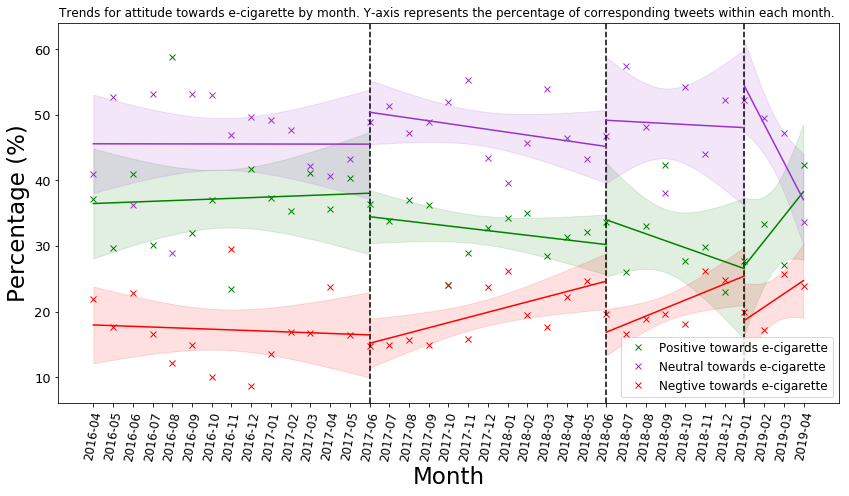

In [34]:
plt.figure(figsize=(14,7))


# print(x)
itemNum = len(x)
# print(itemNum)


plt.plot(x, propotion_positive_ecig, 'gx', label='Positive towards e-cigarette')
plt.plot(x, propotion_neutral_ecig, 'x', color='darkorchid', label='Neutral towards e-cigarette')
plt.plot(x, propotion_negative_ecig, 'rx', label='Negtive towards e-cigarette')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))

print('**************************************************************')
print('Positive: ')
drawRegressionLine_four_section(propotion_positive_ecig, color='g')
print()
print('Neutral: ')
drawRegressionLine_four_section(propotion_neutral_ecig, color='darkorchid')
print()
print('Negative: ')
drawRegressionLine_four_section(propotion_negative_ecig, color='r')
plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)


# print('****************************** Updated ********************************')
# print('Positive: ')
# drawRegressionLine_four_section(proportion_ecig_positive_weight_list, color='g',linestyle="--")
# print()
# print('Neutral: ')
# drawRegressionLine_four_section(proportion_ecig_neutral_weight_list, color='darkorchid',linestyle="--")
# print()
# print('Negative: ')
# drawRegressionLine_four_section(proportion_ecig_negative_weight_list, color='r',linestyle="--")
# plt.rc('legend', fontsize=12)
# plt.rc('ytick', labelsize=13)
# plt.rc('xtick', labelsize=12)


plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards e-cigarette by month. Y-axis represents the percentage of corresponding tweets within each month. ')
# plt.figure(figsize=(40,1))
plt.show()

### 2. e-cig updated

****************************** Updated ********************************
Positive: 
Mean value in different stage:  [45.07, 37.85, 31.27, 35.92]
slope:  [1.8686279109772208, 1.398401804442213, 1.6813260905546468, 7.51413785215699]
intercept:  [32.92569071760228, 10.583563446058548, -17.48521039095262, -223.31300290982372]
R^2:  [0.3518781364539595, 0.0953610875703198, 0.03401485083837541, 0.3191381211164387]
t-test: 
slope- T value:  [1.1192181117113291, -0.3096689817068859, -2.473254069686287]
slope- p value:  [0.2741239829178767, 0.7588847722197134, 0.01838916321166622]
intercept- T value:  [3.033856069658543, 1.162979847489572, 2.853998420251493]
intercept- p value:  [0.005725294531717932, 0.25371214155499383, 0.007206107282237791]


Neutral: 
Mean value in different stage:  [40.71, 40.17, 57.22, 40.86]
slope:  [-1.5790348260476539, -0.5406112449061828, -2.3380597987855882, -14.257492142709472]
intercept:  [50.97564445686485, 50.707559360743254, 125.02315339745296, 532.7412900329858]

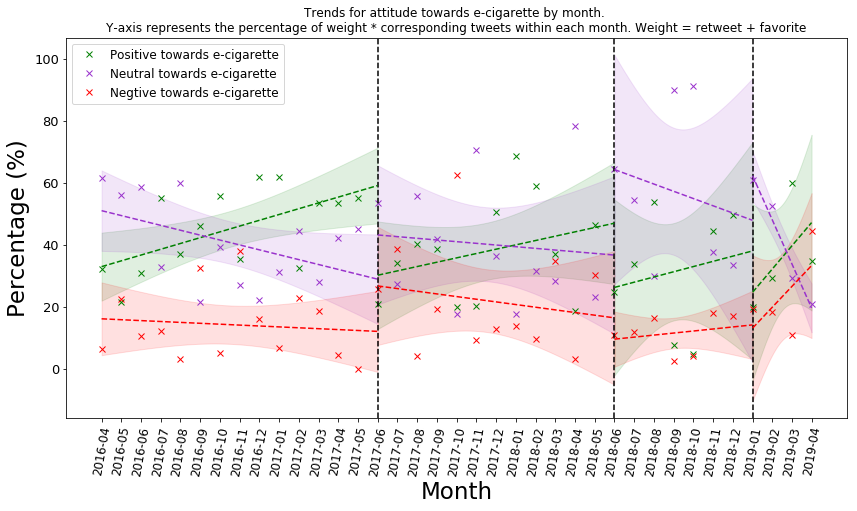

In [37]:
plt.figure(figsize=(14,7))


# print(x)
itemNum = len(x)
# print(itemNum)


plt.plot(x, proportion_ecig_positive_weight_list, 'gx', label='Positive towards e-cigarette')
plt.plot(x, proportion_ecig_neutral_weight_list, 'x', color='darkorchid', label='Neutral towards e-cigarette')
plt.plot(x, proportion_ecig_negative_weight_list, 'rx', label='Negtive towards e-cigarette')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))


print('****************************** Updated ********************************')
print('Positive: ')
drawRegressionLine_four_section(proportion_ecig_positive_weight_list, color='g',linestyle="--")
print()
print('Neutral: ')
drawRegressionLine_four_section(proportion_ecig_neutral_weight_list, color='darkorchid',linestyle="--")
print()
print('Negative: ')
drawRegressionLine_four_section(proportion_ecig_negative_weight_list, color='r',linestyle="--")
plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)


plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards e-cigarette by month. \nY-axis represents the percentage of weight * corresponding tweets within each month. Weight = retweet + favorite')
# plt.figure(figsize=(40,1))
plt.show()

### 3. Tobacco

In [40]:
SF_tobacco = [907,930,974,899,888,710,775, 731,663,626,571,619,588,570,580,665,721,349,656,662,485,550,554,604,647,583,593,606,627, 613, 486, 701, 556, 606, 620, 487, 534]
print('length of SF_tobacco: ', len(SF_tobacco))

sentiment_tobacco_positive = [231, 236, 241, 219, 222, 148, 203, 166, 167, 145, 137, 138, 144, 120, 186, 254, 248, 106, 206, 158, 108, 123, 123, 131, 155, 122, 143, 131, 132, 165, 118, 162, 127, 114, 149, 105, 114]
sentiment_tobacco_neutral = [550, 566, 598, 568, 554, 448, 463, 440, 395, 396, 361, 392, 359, 370, 314, 336, 372, 184, 337, 401, 300, 352, 326, 372, 386, 354, 358, 368, 401, 347, 300, 401, 339, 405, 373, 306, 332]
sentiment_tobacco_negative = [126, 128, 135, 112, 112, 114, 109, 125, 101, 85, 73, 89, 85, 80, 80, 75, 101, 59, 113, 103, 77, 75, 105, 101, 106, 107, 92, 107, 94, 101, 68, 138, 90, 87, 98, 76, 88]
print('length of sentiment_tobacco_positive: ', len(sentiment_tobacco_positive))
print('length of sentiment_tobacco_neutral: ', len(sentiment_tobacco_neutral))
print('length of sentiment_tobacco_negative: ', len(sentiment_tobacco_negative))

propotion_positive_tobacco = []
for i in range(37):
    propotion_positive_tobacco.append((sentiment_tobacco_positive[i]/SF_tobacco[i])*100)
print('length of propotion_positive_tobacco: ', len(propotion_positive_tobacco))

propotion_neutral_tobacco = []
for i in range(37):
    propotion_neutral_tobacco.append((sentiment_tobacco_neutral[i]/SF_tobacco[i])*100)
print('length of propotion_neutral_tobacco: ', len(propotion_neutral_tobacco))

propotion_negative_tobacco = []
for i in range(37):
    propotion_negative_tobacco.append((sentiment_tobacco_negative[i]/SF_tobacco[i])*100)
print('length of propotion_negative_tobacco: ', len(propotion_negative_tobacco))


# ================== Updated
tobacco_positive_weight_list = [6784, 301, 309, 261, 240, 216, 284, 259, 117, 176, 142, 417, 332, 270, 245, 1375, 540, 86, 650, 231, 166, 240, 289, 169, 683, 1111, 385, 305, 174, 358, 421, 1141, 198, 165, 609, 262, 306]
tobacco_neutral_weight_list = [747, 800, 810, 535, 1181, 1386, 611, 1606, 557, 1297, 1227, 1632, 904, 1288, 760, 1701, 642, 1414, 852, 1983, 341, 523, 670, 655, 976, 784, 933, 4394, 787, 776, 2727, 2264, 413, 4178, 846, 494, 1598]
tobacco_negative_weight_list = [502, 299, 221, 165, 785, 216, 253, 341, 104, 167, 187, 309, 125, 639, 280, 3115, 329, 151, 225, 347, 482, 238, 189, 313, 433, 405, 392, 206, 340, 414, 370, 517, 336, 839, 298, 523, 1082]
proportion_tobacco_positive_weight_list = []
proportion_tobacco_neutral_weight_list = []
proportion_tobacco_negative_weight_list = []
for i in range(len(tobacco_positive_weight_list)):
    total = tobacco_positive_weight_list[i] + tobacco_neutral_weight_list[i] + tobacco_negative_weight_list[i]
    proportion_positive = (tobacco_positive_weight_list[i]/total)*100
    proportion_tobacco_positive_weight_list.append(proportion_positive)
    proportion_neutral = (tobacco_neutral_weight_list[i]/total)*100
    proportion_tobacco_neutral_weight_list.append(proportion_neutral)
    proportion_negative = (tobacco_negative_weight_list[i]/total)*100
    proportion_tobacco_negative_weight_list.append(proportion_negative)

print('length of proportion_tobacco_positive_weight_list: ', len(proportion_tobacco_positive_weight_list))
print('length of proportion_tobacco_neutral_weight_list: ', len(proportion_tobacco_neutral_weight_list))
print('length of proportion_tobacco_negative_weight_list: ', len(proportion_tobacco_negative_weight_list))

length of SF_tobacco:  37
length of sentiment_tobacco_positive:  37
length of sentiment_tobacco_neutral:  37
length of sentiment_tobacco_negative:  37
length of propotion_positive_tobacco:  37
length of propotion_neutral_tobacco:  37
length of propotion_negative_tobacco:  37
length of proportion_tobacco_positive_weight_list:  37
length of proportion_tobacco_neutral_weight_list:  37
length of proportion_tobacco_negative_weight_list:  37


**************************************************************
Positive: 
Mean value in different stage:  [23.92, 26.98, 23.42, 21.44]
slope:  [-0.2009115132040713, -1.4309140103564055, 0.08549046098624491, 0.5137617140006869]
intercept:  [25.225696764433295, 54.87854646614875, 20.93972979706628, 3.7134780689560873]
R^2:  [0.25489712109233054, 0.7554518373012918, 0.009001252232112789, 0.09668720640057482]
t-test: 
slope- T value:  [16.546714403551647, -12.243620304923995, -1.6087864151406104]
slope- p value:  [1.2579188530880482e-14, 2.0723726406124234e-13, 0.11664746706995721]
intercept- T value:  [-21.558067057060896, 11.591201218227253, 2.0567735846348034]
intercept- p value:  [3.242483371854196e-17, 8.422664597739671e-13, 0.04722182435948804]


Neutral: 
Mean value in different stage:  [61.92, 57.3, 60.22, 63.0]
slope:  [0.15296519762173155, 1.0291966983472907, -0.26680072235842744, -1.130581033031162]
intercept:  [60.92360235485917, 37.23045657513215, 67.96048871672923, 102.004779

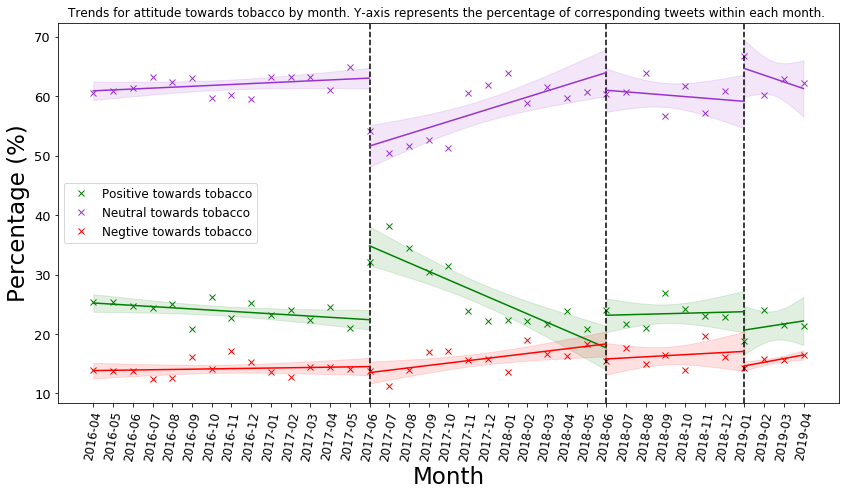

In [27]:
plt.figure(figsize=(14,7))


# print(x)
itemNum = len(x)
# print(itemNum)

plt.plot(x, propotion_positive_tobacco, 'gx', label='Positive towards tobacco')
plt.plot(x, propotion_neutral_tobacco, 'x', color='darkorchid', label='Neutral towards tobacco')
plt.plot(x, propotion_negative_tobacco, 'rx', label='Negtive towards tobacco')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))

print('**************************************************************')
print('Positive: ')
drawRegressionLine_four_section(propotion_positive_tobacco, color='g')
print()
print('Neutral: ')
drawRegressionLine_four_section(propotion_neutral_tobacco, color='darkorchid')
print()
print('Negative: ')
drawRegressionLine_four_section(propotion_negative_tobacco, color='r')

plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards tobacco by month. Y-axis represents the percentage of corresponding tweets within each month. ')
# plt.figure(figsize=(40,1))
plt.show()

### 4. Tobacco - updated

****************************** Updated ********************************
Positive: 
Mean value in different stage:  [21.76, 24.22, 18.17, 17.16]
slope:  [-2.384945048482799, 1.175012875830245, 1.4114836658268808, 0.6935481876115843]
intercept:  [37.26461156447015, 1.3065162288771854, -22.761431370811025, -6.763132311710354]
R^2:  [0.2738044014265998, 0.11408107268205181, 0.14893214068998228, 0.004270095001298491]
t-test: 
slope- T value:  [-8.357570821639516, -0.4860611094926293, 0.5166511679011263]
slope- p value:  [1.4429500432706316e-08, 0.6303421558767575, 0.6086490756187404]
intercept- T value:  [5.993831348561677, 2.119019777273175, -0.3492314112037489]
intercept- p value:  [3.459392858040749e-06, 0.04220233675572821, 0.7290080484005235]


Neutral: 
Mean value in different stage:  [61.58, 52.08, 61.95, 55.26]
slope:  [2.456854871869285, -0.5867442862945349, -2.8406825183349853, -9.096269447804206]
intercept:  [45.61275745879401, 63.52114893155791, 144.32511865751502, 369.077721342

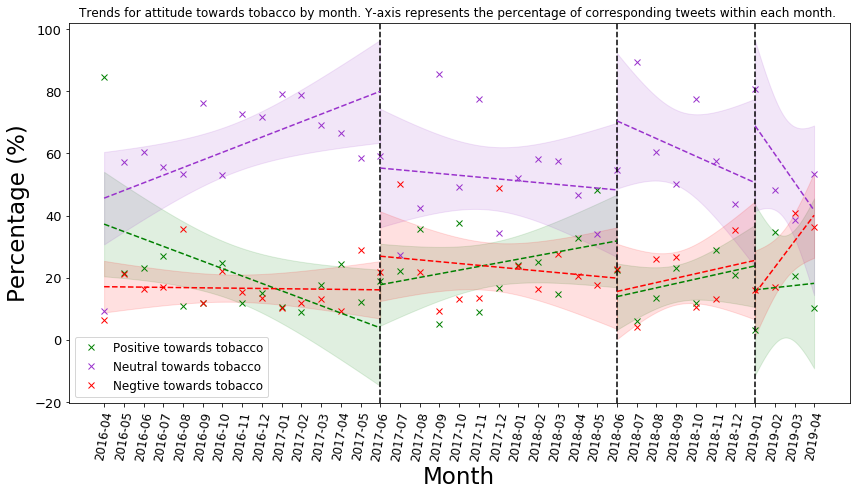

In [49]:
plt.figure(figsize=(14,7))


# print(x)
itemNum = len(x)
# print(itemNum)

plt.plot(x, proportion_tobacco_positive_weight_list, 'gx', label='Positive towards tobacco')
plt.plot(x, proportion_tobacco_neutral_weight_list, 'x', color='darkorchid', label='Neutral towards tobacco')
plt.plot(x, proportion_tobacco_negative_weight_list, 'rx', label='Negtive towards tobacco')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))

print('****************************** Updated ********************************')
print('Positive: ')
drawRegressionLine_four_section(proportion_tobacco_positive_weight_list, color='g',linestyle="--")
print()
print('Neutral: ')
drawRegressionLine_four_section(proportion_tobacco_neutral_weight_list, color='darkorchid',linestyle="--")
print()
print('Negative: ')
drawRegressionLine_four_section(proportion_tobacco_negative_weight_list, color='r',linestyle="--")

plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards tobacco by month. Y-axis represents the percentage of corresponding tweets within each month. ')
# plt.figure(figsize=(40,1))
plt.show()

### 5. flavored tobacco

In [47]:
SF_flavored_tobacco = [97, 77, 69, 85, 75, 71, 62, 45, 57, 61, 52, 53, 56, 60, 44, 42, 56, 35, 27, 51, 31, 44, 45, 40, 35, 32, 38, 51, 54, 56, 40, 38, 33, 42, 36, 48, 43]
print('length of SF_flavored_tobacco: ', len(SF_flavored_tobacco))

sentiment_SF_flavored_tobacco_positive = [22, 21, 13, 21, 16, 15, 20, 15, 11, 13, 13, 17, 16, 18, 18, 12, 11, 10, 8, 9, 9, 11, 12, 7, 6, 5, 7, 7, 14, 11, 9, 7, 8, 11, 12, 8, 9]
sentiment_SF_flavored_tobacco_neutral = [68, 50, 49, 61, 51, 44, 37, 26, 38, 42, 36, 33, 32, 38, 20, 28, 38, 20, 16, 34, 18, 25, 25, 24, 22, 17, 27, 38, 36, 41, 29, 25, 21, 24, 19, 30, 30]
sentiment_SF_flavored_tobacco_negative = [7, 6, 7, 3, 8, 12, 5, 4, 8, 6, 3, 3, 8, 4, 6, 2, 7, 5, 3, 8, 4, 8, 8, 9, 7, 10, 4, 6, 4, 4, 2, 6, 4, 7, 5, 10, 4]
print('length of sentiment_SF_flavored_tobacco_positive: ', len(sentiment_SF_flavored_tobacco_positive))
print('length of sentiment_SF_flavored_tobacco_neutral: ', len(sentiment_SF_flavored_tobacco_neutral))
print('length of sentiment_SF_flavored_tobacco_negative: ', len(sentiment_SF_flavored_tobacco_negative))

propotion_positive_flavored_tobacco = []
propotion_neutral_flavored_tobacco = []
propotion_negative_flavored_tobacco = []
for i in range(37):
    propotion_positive_flavored_tobacco.append((sentiment_SF_flavored_tobacco_positive[i]/SF_flavored_tobacco[i])*100)
print('length of propotion_positive_flavored_tobacco: ', len(propotion_positive_flavored_tobacco))

for i in range(37):
    propotion_neutral_flavored_tobacco.append((sentiment_SF_flavored_tobacco_neutral[i]/SF_flavored_tobacco[i])*100)
print('length of propotion_neutral_flavored_tobacco: ', len(propotion_neutral_flavored_tobacco))

for i in range(37):
    propotion_negative_flavored_tobacco.append((sentiment_SF_flavored_tobacco_negative[i]/SF_flavored_tobacco[i])*100)
print('length of propotion_negative_flavored_tobacco: ', len(propotion_negative_flavored_tobacco))


# ================== Updated
flavored_tobacco_positive_weight_list = [20, 21, 14, 30, 15, 20, 27, 9, 6, 9, 9, 34, 118, 25, 23, 10, 9, 8, 19, 27, 15, 27, 12, 12, 15, 6, 21, 10, 10, 15, 33, 6, 45, 19, 4, 121, 8]
flavored_tobacco_neutral_weight_list = [70, 54, 35, 82, 53, 30, 42, 40, 21, 82, 117, 34, 108, 18, 11, 29, 16, 72, 14, 29, 32, 68, 44, 58, 12, 26, 69, 53, 76, 98, 216, 17, 30, 30, 174, 89, 197]
flavored_tobacco_negative_weight_list = [6, 17, 48, 0, 8, 4, 5, 9, 8, 20, 8, 0, 9, 5, 83, 2, 113, 7, 5, 13, 10, 8, 26, 13, 15, 8, 4, 3, 4, 18, 0, 5, 10, 323, 20, 9, 2]

proportion_flavored_tobacco_positive_weight_list = []
proportion_flavored_tobacco_neutral_weight_list = []
proportion_flavored_tobacco_negative_weight_list = []
for i in range(len(flavored_tobacco_positive_weight_list)):
    total = flavored_tobacco_positive_weight_list[i] + flavored_tobacco_neutral_weight_list[i] + flavored_tobacco_negative_weight_list[i]
    proportion_positive = (flavored_tobacco_positive_weight_list[i]/total)*100
    proportion_flavored_tobacco_positive_weight_list.append(proportion_positive)
    proportion_neutral = (flavored_tobacco_neutral_weight_list[i]/total)*100
    proportion_flavored_tobacco_neutral_weight_list.append(proportion_neutral)
    proportion_negative = (flavored_tobacco_negative_weight_list[i]/total)*100
    proportion_flavored_tobacco_negative_weight_list.append(proportion_negative)

print('length of proportion_flavored_tobacco_positive_weight_list: ', len(proportion_flavored_tobacco_positive_weight_list))
print('length of proportion_flavored_tobacco_neutral_weight_list: ', len(proportion_flavored_tobacco_neutral_weight_list))
print('length of proportion_flavored_tobacco_negative_weight_list: ', len(proportion_flavored_tobacco_negative_weight_list))


length of SF_flavored_tobacco:  37
length of sentiment_SF_flavored_tobacco_positive:  37
length of sentiment_SF_flavored_tobacco_neutral:  37
length of sentiment_SF_flavored_tobacco_negative:  37
length of propotion_positive_flavored_tobacco:  37
length of propotion_neutral_flavored_tobacco:  37
length of propotion_negative_flavored_tobacco:  37
length of proportion_flavored_tobacco_positive_weight_list:  37
length of proportion_flavored_tobacco_neutral_weight_list:  37
length of proportion_flavored_tobacco_negative_weight_list:  37


**************************************************************
Positive: 
Mean value in different stage:  [25.56, 24.66, 20.41, 24.28]
slope:  [0.4969090972160015, -1.4266071288404991, 0.8367612063428944, -3.2447397563769114]
intercept:  [22.327784778602254, 52.48036197255675, -3.854817445330047, 136.22369878213289]
R^2:  [0.17088735957720014, 0.47998210132262986, 0.19096021682623487, 0.3400701142823196]
t-test: 
slope- T value:  [12.413821605575277, -9.825641432261026, 6.473834689006556]
slope- p value:  [6.175274960829965e-12, 4.869762161870147e-11, 1.8439350382846329e-07]
intercept- T value:  [-11.716279021178394, 10.244855556122415, -6.827694012892427]
intercept- p value:  [2.0477507001599007e-11, 1.7927597857787945e-11, 6.382447700461434e-08]


Neutral: 
Mean value in different stage:  [65.2, 59.12, 69.62, 60.55]
slope:  [-0.5577244634594183, -0.10060351427893677, -1.2091475346167493, 4.7595976375128055]
intercept:  [68.82053907021877, 61.08406306244437, 104.68945353283539, -103.6

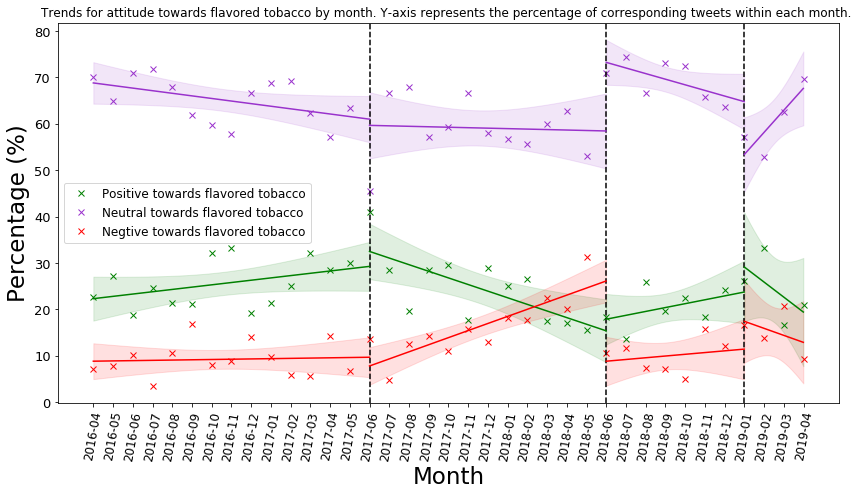

In [46]:
plt.figure(figsize=(14,7))

# print(x)
itemNum = len(x)
# print(itemNum)

plt.plot(x, propotion_positive_flavored_tobacco, 'gx', label='Positive towards flavored tobacco')
plt.plot(x, propotion_neutral_flavored_tobacco, 'x', color='darkorchid', label='Neutral towards flavored tobacco')
plt.plot(x, propotion_negative_flavored_tobacco, 'rx', label='Negtive towards flavored tobacco')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))

print('**************************************************************')
print('Positive: ')
drawRegressionLine_four_section(propotion_positive_flavored_tobacco, color='g')
print()
print('Neutral: ')
drawRegressionLine_four_section(propotion_neutral_flavored_tobacco, color='darkorchid')
print()
print('Negative: ')
drawRegressionLine_four_section(propotion_negative_flavored_tobacco, color='r')

plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards flavored tobacco by month. Y-axis represents the percentage of corresponding tweets within each month. ')
# plt.figure(figsize=(40,1))
plt.show()

### 6. flavored tobacco - updated

****************************** Updated ********************************
Positive: 
Mean value in different stage:  [26.99, 23.44, 21.1, 16.56]
slope:  [1.644672598663656, 0.17220124837070383, 3.803509510978047, 4.950256178578483]
intercept:  [16.303857660627408, 20.078041061794092, -89.20517675819951, -154.22293697251126]
R^2:  [0.19527899682311645, 0.0022895905002370265, 0.3103107473690667, 0.06123996032355872]
t-test: 
slope- T value:  [3.5762604340461275, -5.639436774246612, -0.4620140140537708]
slope- p value:  [0.0015249985148667522, 3.434425169793428e-06, 0.6469303974663728]
intercept- T value:  [-0.5930551368576039, 6.715799946883723, 0.7902396785990142]
intercept- p value:  [0.5586919669029797, 1.6299912938409387e-07, 0.4347096225028453]


Neutral: 
Mean value in different stage:  [60.47, 49.39, 70.82, 57.94]
slope:  [-0.7260613433347001, 2.0848908236833967, -5.400191381670977, 21.40741795177648]
intercept:  [65.1885775859932, 8.730177493186561, 227.42216173785002, -680.6180054

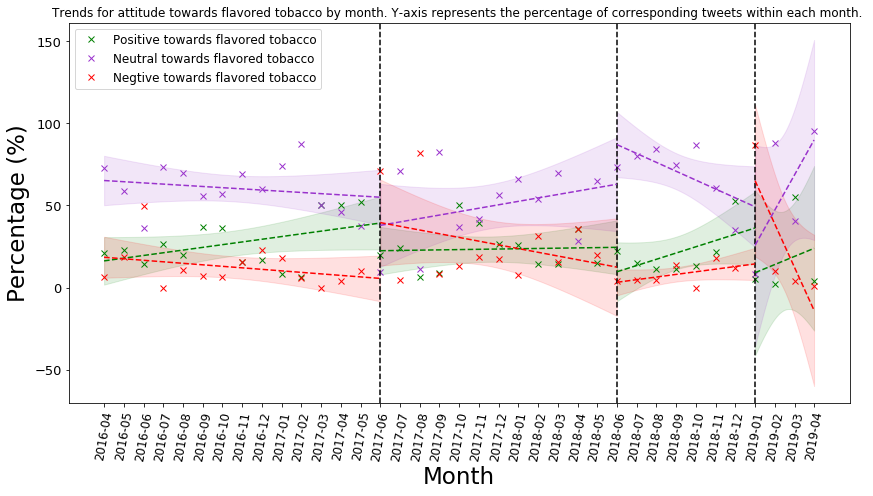

In [50]:
plt.figure(figsize=(14,7))

# print(x)
itemNum = len(x)
# print(itemNum)

plt.plot(x, proportion_flavored_tobacco_positive_weight_list, 'gx', label='Positive towards flavored tobacco')
plt.plot(x, proportion_flavored_tobacco_neutral_weight_list, 'x', color='darkorchid', label='Neutral towards flavored tobacco')
plt.plot(x, proportion_flavored_tobacco_negative_weight_list, 'rx', label='Negtive towards flavored tobacco')


plt.legend()
# plt.vlines(6, 0, 1, colors = "black", linestyles = "dashed")
plt.axvline(14, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Proposal', xy=(4,-0.3))
plt.axvline(26, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Approved', xy=(16,-0.3))
plt.axvline(33, hold=None,color='black',linestyle="--")
# plt.annotate(s = 'Enforcement ', xy=(23,-0.3))

print('****************************** Updated ********************************')
print('Positive: ')
drawRegressionLine_four_section(proportion_flavored_tobacco_positive_weight_list, color='g',linestyle="--")
print()
print('Neutral: ')
drawRegressionLine_four_section(proportion_flavored_tobacco_neutral_weight_list, color='darkorchid',linestyle="--")
print()
print('Negative: ')
drawRegressionLine_four_section(proportion_flavored_tobacco_negative_weight_list, color='r',linestyle="--")

plt.rc('legend', fontsize=12)
plt.rc('ytick', labelsize=13)
plt.rc('xtick', labelsize=12)

plt.xticks(rotation=80)
plt.xlabel('Month', font_setting)
plt.ylabel('Percentage (%)', font_setting)
plt.title('Trends for attitude towards flavored tobacco by month. Y-axis represents the percentage of corresponding tweets within each month. ')
# plt.figure(figsize=(40,1))
plt.show()